<a href="https://colab.research.google.com/github/feaviolp/msc-project/blob/main/NIJ%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis of the NIJ recidivism dataset**

# **Data pre-processing**

Import libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import scipy.stats as st
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
# ignore future deprecation
warnings.filterwarnings('ignore')

Load the CSV file into a pandas datafram

In [142]:
url = "https://raw.githubusercontent.com/feaviolp/msc-project/main/NIJ_s_Recidivism_Challenge_Full_Dataset_20240222.csv"
NIJ = pd.read_csv(url)

Look at the shape and features of the dataset

In [143]:
NIJ.shape

(25835, 54)

In [144]:
NIJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 25835 non-null  int64  
 1   Gender                                             25835 non-null  object 
 2   Race                                               25835 non-null  object 
 3   Age_at_Release                                     25835 non-null  object 
 4   Residence_PUMA                                     25835 non-null  int64  
 5   Gang_Affiliated                                    22668 non-null  object 
 6   Supervision_Risk_Score_First                       25360 non-null  float64
 7   Supervision_Level_First                            24115 non-null  object 
 8   Education_Level                                    25835 non-null  object 
 9   Depend

The dataset has 25,836 rows and 54 columns.

Some of the columns have missing values (less than 25,836 values).


Next describe the dataset, then look at the top and bottom 4 rows.

In [145]:
NIJ.describe()

,ID,Residence_PUMA,Supervision_Risk_Score_First,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Training_Sample
count,25835.000000,25835.000000,25360.000000,19732.000000,20663.000000,20663.000000,20663.000000,20663.00000,25373.000000,25027.000000,25835.000000
mean,13314.004838,12.361796,6.082216,93.890044,0.063350,0.013741,0.012890,0.00755,0.482331,0.769295,0.697813
std,7722.206327,7.133742,2.381442,117.169847,0.138453,0.061233,0.060581,0.04115,0.425004,0.813787,0.459215
min,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,6626.500000,6.000000,4.000000,28.837366,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,13270.000000,12.000000,6.000000,55.424812,0.000000,0.000000,0.000000,0.00000,0.475728,0.635217,1.000000
75%,20021.500000,18.000000,8.000000,110.333333,0.071429,0.000000,0.000000,0.00000,0.969325,1.000000,1.000000
max,26761.000000,25.000000,10.000000,1088.500000,1.000000,1.000000,1.000000,1.00000,1.000000,8.000000,1.000000


In [146]:
NIJ.head()

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


In [147]:
NIJ.tail()

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
25830,26756,M,BLACK,23-27,9,False,5.0,Standard,At least some college,1,...,0.0,0.0,0.189507,0.572044,False,True,True,False,False,1
25831,26758,M,WHITE,38-42,25,False,5.0,Standard,At least some college,3 or more,...,0.0,0.0,0.757098,0.576104,False,True,False,True,False,1
25832,26759,M,BLACK,33-37,15,False,5.0,Standard,At least some college,3 or more,...,NaN,NaN,0.711138,0.894125,False,True,False,True,False,1
25833,26760,F,WHITE,33-37,15,NaN,5.0,Standard,At least some college,3 or more,...,0.0,0.0,0.000000,0.000000,True,False,False,False,False,1
25834,26761,M,WHITE,28-32,12,False,5.0,Standard,High School Diploma,3 or more,...,0.0,0.0,0.124454,0.398745,False,True,True,False,False,1


Drop ID and Training_Sample because they will not be requried for the EDA.

In [148]:
NIJ.drop(columns=['ID', 'Training_Sample'], inplace=True)

Also drop Recidivism_Arrest_Year1, Recidivism_Arrest_Year2 and Recidivism_Arrest_Year3 because we're only interested in Recidivism_Within_3years

In [149]:
NIJ.drop(columns=['Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year3'], inplace=True)

Now take a look at the rows with missing values.

In [150]:
NIJ.isna().sum()

Gender                                                  0
Race                                                    0
Age_at_Release                                          0
Residence_PUMA                                          0
Gang_Affiliated                                      3167
Supervision_Risk_Score_First                          475
Supervision_Level_First                              1720
Education_Level                                         0
Dependents                                              0
Prison_Offense                                       3277
Prison_Years                                            0
Prior_Arrest_Episodes_Felony                            0
Prior_Arrest_Episodes_Misd                              0
Prior_Arrest_Episodes_Violent                           0
Prior_Arrest_Episodes_Property                          0
Prior_Arrest_Episodes_Drug                              0
Prior_Arrest_Episodes_PPViolationCharges                0
Prior_Arrest_E

Replace null values with appropriate values:

* Gang_Affiliated is missing only for Female offenders so replace with NA
* Supervision_Risk_Score_First is INTEGER so replace with the most frequently occuring value
* Supervision_Level_First is CATEGORICAL so replace with the most frequently occuring value
* Prison_Offense is categorical and includes "Other" so replace with "Other"
* Avg_Days_per_DrugTest is FLOAT so replace with avergae value
* DrugTests_THC_Positive is FLOAT but replace with 0
* DrugTests_Cocaine_Positive is FLOAT but replace with 0
* DrugTests_Meth_Positive is FLOAT but replace with 0
* DrugTests_Other_Positive is FLOAT but replace with 0
* Percent_Days_Employed is FLOAT so replace with avergae value
* Jobs_Per_Year is FLOAT so replace with avergae value


In [151]:
NIJ['Gang_Affiliated'].fillna('NA', inplace=True)
NIJ['Supervision_Risk_Score_First'].fillna(NIJ['Supervision_Risk_Score_First'].mode().iloc[0], inplace=True)
NIJ['Supervision_Level_First'].fillna(NIJ['Supervision_Level_First'].mode().iloc[0], inplace=True)
NIJ['Prison_Offense'].fillna('Other', inplace=True)
NIJ['Avg_Days_per_DrugTest'].fillna(NIJ['Avg_Days_per_DrugTest'].mean(), inplace=True)
NIJ['DrugTests_THC_Positive'].fillna('0', inplace=True)
NIJ['DrugTests_Cocaine_Positive'].fillna('0', inplace=True)
NIJ['DrugTests_Meth_Positive'].fillna('0', inplace=True)
NIJ['DrugTests_Other_Positive'].fillna('0', inplace=True)
NIJ['Percent_Days_Employed'].fillna(NIJ['Percent_Days_Employed'].mean(), inplace=True)
NIJ['Jobs_Per_Year'].fillna(NIJ['Jobs_Per_Year'].mean(), inplace=True)

Re-check to make sure there are no missing values

In [152]:
NIJ.isna().sum()

Gender                                               0
Race                                                 0
Age_at_Release                                       0
Residence_PUMA                                       0
Gang_Affiliated                                      0
Supervision_Risk_Score_First                         0
Supervision_Level_First                              0
Education_Level                                      0
Dependents                                           0
Prison_Offense                                       0
Prison_Years                                         0
Prior_Arrest_Episodes_Felony                         0
Prior_Arrest_Episodes_Misd                           0
Prior_Arrest_Episodes_Violent                        0
Prior_Arrest_Episodes_Property                       0
Prior_Arrest_Episodes_Drug                           0
Prior_Arrest_Episodes_PPViolationCharges             0
Prior_Arrest_Episodes_DVCharges                      0
Prior_Arre

Some features contain integers but max out with, "x or more". To enable numerical analysis the "or more" will be removed:
* Dependents: "3 or more" changed to "3"
* Prior_Arrest_Episodes_Felony: "10 more more" changed to "10"
* Prior_Arrest_Episodes_Misd: "6 or more" changed to "6"
* Prior_Arrest_Episodes_Violent: "3 or more" changed to "3"
* Prior_Arrest_Episodes_Property: "5 or more" changed to "5"
* Prior_Arrest_Episodes_Drug: "5 or more" changed to "5"
* Prior_Arrest_Episodes_PPViolationCharges: "5 or more" changed to "5"
* Prior_Conviction_Episodes_Felony.replace: "3 or more" changed to "3"
* Prior_Conviction_Episodes_Misd.replace: "4 or more" changed to "4"
* Prior_Conviction_Episodes_Prop.replace: "3 or more" changed to "3"
* Prior_Conviction_Episodes_Drug.replace: "2 or more" changed to "2"
* Delinquency_Reports: "4 or more" changed to "4"
* Program_Attendances: "10 more more" changed to "10"
* Program_UnexcusedAbsences: "3 or more" changed to "3"
* Residence_Changes: "3 or more" changed to "3"

In [153]:
NIJ.Dependents.replace("3 or more","3", inplace=True)
NIJ.Prior_Arrest_Episodes_Felony.replace("10 or more","10", inplace=True)
NIJ.Prior_Arrest_Episodes_Misd.replace("6 or more","6", inplace=True)
NIJ.Prior_Arrest_Episodes_Violent.replace("3 or more","3", inplace=True)
NIJ.Prior_Arrest_Episodes_Property.replace("5 or more","5", inplace=True)
NIJ.Prior_Arrest_Episodes_Drug.replace("5 or more","5", inplace=True)
NIJ.Prior_Arrest_Episodes_PPViolationCharges.replace("5 or more","5", inplace=True)
NIJ.Prior_Conviction_Episodes_Felony.replace("3 or more","3", inplace=True)
NIJ.Prior_Conviction_Episodes_Misd.replace("4 or more","4", inplace=True)
NIJ.Prior_Conviction_Episodes_Prop.replace("3 or more","3", inplace=True)
NIJ.Prior_Conviction_Episodes_Drug.replace("2 or more","2", inplace=True)
NIJ.Delinquency_Reports.replace("4 or more","4", inplace=True)
NIJ.Program_Attendances.replace("10 or more","10", inplace=True)
NIJ.Program_UnexcusedAbsences.replace("3 or more","3", inplace=True)
NIJ.Residence_Changes.replace("3 or more","3", inplace=True)

Age_at_Release is populated with ranges which won't be assessed as numeric, so change each value to the first number in each range

In [154]:
sorted(NIJ['Age_at_Release'].unique())

['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48 or older']

In [155]:
NIJ.Age_at_Release.replace("18-22","18", inplace=True)
NIJ.Age_at_Release.replace("23-27","23", inplace=True)
NIJ.Age_at_Release.replace("28-32","28", inplace=True)
NIJ.Age_at_Release.replace("33-37","33", inplace=True)
NIJ.Age_at_Release.replace("38-42","38", inplace=True)
NIJ.Age_at_Release.replace("43-47","43", inplace=True)
NIJ.Age_at_Release.replace("48 or older","48", inplace=True)

In [156]:
sorted(NIJ['Age_at_Release'].unique())

['18', '23', '28', '33', '38', '43', '48']

Now replace M with Male and F with Female in Gender to make it easier to read later after the are one-hot encoded

In [157]:
NIJ.Gender.replace("M","Male", inplace=True)
NIJ.Gender.replace("F","Female", inplace=True)

In [158]:
NIJ

,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,...,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years
0,Male,BLACK,43,16,False,3.0,Standard,At least some college,3,Drug,...,2,612.000000,0.0,0.0,0.0,0.0,0.488562,0.447610,False,False
1,Male,BLACK,33,16,False,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,...,2,35.666667,0.0,0.0,0.0,0.0,0.425234,2.000000,False,True
2,Male,BLACK,48,24,False,7.0,High,At least some college,3,Drug,...,0,93.666667,0.333333,0.0,0.166667,0.0,0.000000,0.000000,False,True
3,Male,WHITE,38,16,False,7.0,High,Less than HS diploma,1,Property,...,3,25.400000,0.0,0.0,0.0,0.0,1.000000,0.718996,False,False
4,Male,WHITE,33,16,False,4.0,Specialized,Less than HS diploma,3,Violent/Non-Sex,...,0,23.117647,0.0,0.0,0.058824,0.0,0.203562,0.929389,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25830,Male,BLACK,23,9,False,5.0,Standard,At least some college,1,Other,...,0,127.700000,0.0,0.0,0.0,0.0,0.189507,0.572044,False,True
25831,Male,WHITE,38,25,False,5.0,Standard,At least some college,3,Other,...,0,42.266667,0.0,0.0,0.0,0.0,0.757098,0.576104,False,True
25832,Male,BLACK,33,15,False,5.0,Standard,At least some college,3,Other,...,1,93.890044,0,0,0,0,0.711138,0.894125,False,True
25833,Female,WHITE,33,15,NA,5.0,Standard,At least some college,3,Other,...,0,58.100000,0.0,0.0,0.0,0.0,0.000000,0.000000,True,False


Now convert all of the modified columns to numeric.

In [159]:
NIJ[["Dependents"]] = NIJ[["Dependents"]].apply(pd.to_numeric)
NIJ[["Prior_Arrest_Episodes_Felony", "Prior_Arrest_Episodes_Misd"]] = NIJ[["Prior_Arrest_Episodes_Felony", "Prior_Arrest_Episodes_Misd"]].apply(pd.to_numeric)
NIJ[["Prior_Arrest_Episodes_Violent", "Prior_Arrest_Episodes_Property"]] = NIJ[["Prior_Arrest_Episodes_Violent", "Prior_Arrest_Episodes_Property"]].apply(pd.to_numeric)
NIJ[["Prior_Arrest_Episodes_Drug", "Prior_Arrest_Episodes_PPViolationCharges"]] = NIJ[["Prior_Arrest_Episodes_Drug", "Prior_Arrest_Episodes_PPViolationCharges"]].apply(pd.to_numeric)
NIJ[["Prior_Conviction_Episodes_Felony", "Prior_Conviction_Episodes_Misd"]] = NIJ[["Prior_Conviction_Episodes_Felony", "Prior_Conviction_Episodes_Misd"]].apply(pd.to_numeric)
NIJ[["Prior_Conviction_Episodes_Prop", "Prior_Conviction_Episodes_Drug"]] = NIJ[["Prior_Conviction_Episodes_Prop", "Prior_Conviction_Episodes_Drug"]].apply(pd.to_numeric)
NIJ[["Delinquency_Reports", "Program_Attendances"]] = NIJ[["Delinquency_Reports", "Program_Attendances"]].apply(pd.to_numeric)
NIJ[["Program_UnexcusedAbsences", "Residence_Changes"]] = NIJ[["Program_UnexcusedAbsences", "Residence_Changes"]].apply(pd.to_numeric)

NIJ[["DrugTests_THC_Positive", "DrugTests_Cocaine_Positive"]] = NIJ[["DrugTests_THC_Positive", "DrugTests_Cocaine_Positive"]].apply(pd.to_numeric)
NIJ[["DrugTests_Meth_Positive", "DrugTests_Other_Positive"]] = NIJ[["DrugTests_Meth_Positive", "DrugTests_Other_Positive"]].apply(pd.to_numeric)

NIJ[["Age_at_Release"]] = NIJ[["Age_at_Release"]].apply(pd.to_numeric)

In [160]:
NIJ['Prior_Arrest_Episodes_Misd'].unique()


array([6, 4, 0, 1, 3, 5, 2])

In [161]:
NIJ['Gang_Affiliated'] = NIJ['Gang_Affiliated'].astype('bool')

# **Exploratory Data Analysis**

Examine numerical and categorical features.

In [162]:
numeric_features = NIJ.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Age_at_Release', 'Residence_PUMA', 'Supervision_Risk_Score_First',
       'Dependents', 'Prior_Arrest_Episodes_Felony',
       'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent',
       'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug',
       'Prior_Arrest_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd',
       'Prior_Conviction_Episodes_Prop', 'Prior_Conviction_Episodes_Drug',
       'Delinquency_Reports', 'Program_Attendances',
       'Program_UnexcusedAbsences', 'Residence_Changes',
       'Avg_Days_per_DrugTest', 'DrugTests_THC_Positive',
       'DrugTests_Cocaine_Positive', 'DrugTests_Meth_Positive',
       'DrugTests_Other_Positive', 'Percent_Days_Employed', 'Jobs_Per_Year'],
      dtype='object')

In [163]:
categorical_features = NIJ.select_dtypes(include=[object])
categorical_features.columns

Index(['Gender', 'Race', 'Supervision_Level_First', 'Education_Level',
       'Prison_Offense', 'Prison_Years'],
      dtype='object')

Estimate Skewness and Kurtosis of numerical features

In [164]:
numeric_features.skew()

Age_at_Release                               0.262007
Residence_PUMA                               0.098660
Supervision_Risk_Score_First                -0.136975
Dependents                                   0.050562
Prior_Arrest_Episodes_Felony                 0.040836
Prior_Arrest_Episodes_Misd                  -0.115781
Prior_Arrest_Episodes_Violent                0.688265
Prior_Arrest_Episodes_Property               0.321845
Prior_Arrest_Episodes_Drug                   0.616521
Prior_Arrest_Episodes_PPViolationCharges     0.196785
Prior_Conviction_Episodes_Felony             0.160138
Prior_Conviction_Episodes_Misd               0.295852
Prior_Conviction_Episodes_Prop               0.546661
Prior_Conviction_Episodes_Drug               0.442740
Delinquency_Reports                          1.162612
Program_Attendances                          0.819652
Program_UnexcusedAbsences                    2.093484
Residence_Changes                            0.941644
Avg_Days_per_DrugTest       

In [165]:
numeric_features.kurt()

Age_at_Release                               -1.092770
Residence_PUMA                               -1.239440
Supervision_Risk_Score_First                 -0.734744
Dependents                                   -1.560358
Prior_Arrest_Episodes_Felony                 -1.362785
Prior_Arrest_Episodes_Misd                   -1.515902
Prior_Arrest_Episodes_Violent                -0.857591
Prior_Arrest_Episodes_Property               -1.373212
Prior_Arrest_Episodes_Drug                   -0.880327
Prior_Arrest_Episodes_PPViolationCharges     -1.488162
Prior_Conviction_Episodes_Felony             -1.446276
Prior_Conviction_Episodes_Misd               -1.415104
Prior_Conviction_Episodes_Prop               -1.237449
Prior_Conviction_Episodes_Drug               -1.427408
Delinquency_Reports                          -0.425493
Program_Attendances                          -0.877871
Program_UnexcusedAbsences                     2.852693
Residence_Changes                            -0.395310
Avg_Days_p

**Correlations**

In [166]:
# NIJ.corr(method ='pearson')
numeric_features.corr()

,Age_at_Release,Residence_PUMA,Supervision_Risk_Score_First,Dependents,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,...,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year
Age_at_Release,1.000000,0.022132,-0.474483,0.149536,0.370477,0.272936,0.193949,0.263956,0.155872,0.173532,...,-0.009654,-0.092027,-0.009472,0.067365,-0.195092,0.067101,-0.002315,-0.002634,0.062651,-0.039791
Residence_PUMA,0.022132,1.000000,-0.009568,-0.010828,0.028485,0.047212,-0.013974,0.006619,0.036650,0.060351,...,-0.000652,-0.028561,-0.001424,-0.024877,-0.044197,-0.031516,0.040276,0.003403,0.034806,0.044123
Supervision_Risk_Score_First,-0.474483,-0.009568,1.000000,-0.113169,0.049855,-0.068378,-0.062500,0.097777,0.006608,0.060859,...,0.061068,0.117546,0.118164,-0.036588,0.240734,0.032673,0.047783,0.029040,-0.045773,0.032629
Dependents,0.149536,-0.010828,-0.113169,1.000000,0.046847,0.092013,0.101109,-0.020090,0.051614,0.018629,...,-0.025537,-0.017636,0.010702,0.041916,-0.034796,-0.011982,-0.024194,-0.015315,0.024515,-0.012196
Prior_Arrest_Episodes_Felony,0.370477,0.028485,0.049855,0.046847,1.000000,0.549550,0.312523,0.651853,0.448722,0.689900,...,-0.042845,0.035406,0.068587,0.019212,-0.006759,0.097322,0.061511,0.033060,-0.066495,-0.034932
Prior_Arrest_Episodes_Misd,0.272936,0.047212,-0.068378,0.092013,0.549550,1.000000,0.329010,0.423262,0.388256,0.639819,...,-0.026923,0.021315,0.020777,0.003184,-0.019115,0.054025,0.068795,0.037052,-0.048863,-0.028244
Prior_Arrest_Episodes_Violent,0.193949,-0.013974,-0.062500,0.101109,0.312523,0.329010,1.000000,0.116989,0.044837,0.190699,...,-0.045505,-0.000379,0.031836,0.015030,0.006694,0.041577,-0.018911,0.002670,-0.029963,-0.016958
Prior_Arrest_Episodes_Property,0.263956,0.006619,0.097777,-0.020090,0.651853,0.423262,0.116989,1.000000,0.003920,0.418945,...,-0.093270,0.009723,0.079612,0.005478,-0.014227,0.078915,0.051536,0.027388,-0.077196,-0.025949
Prior_Arrest_Episodes_Drug,0.155872,0.036650,0.006608,0.051614,0.448722,0.388256,0.044837,0.003920,1.000000,0.325505,...,0.055043,0.019453,-0.003555,0.022580,0.011803,0.024331,0.048348,0.013197,-0.000913,-0.029659
Prior_Arrest_Episodes_PPViolationCharges,0.173532,0.060351,0.060859,0.018629,0.689900,0.639819,0.190699,0.418945,0.325505,1.000000,...,-0.016844,0.074000,0.052942,-0.014980,0.025231,0.089476,0.086258,0.051150,-0.080917,-0.019577


<Axes: title={'center': 'Correlation of Numeric Features'}>

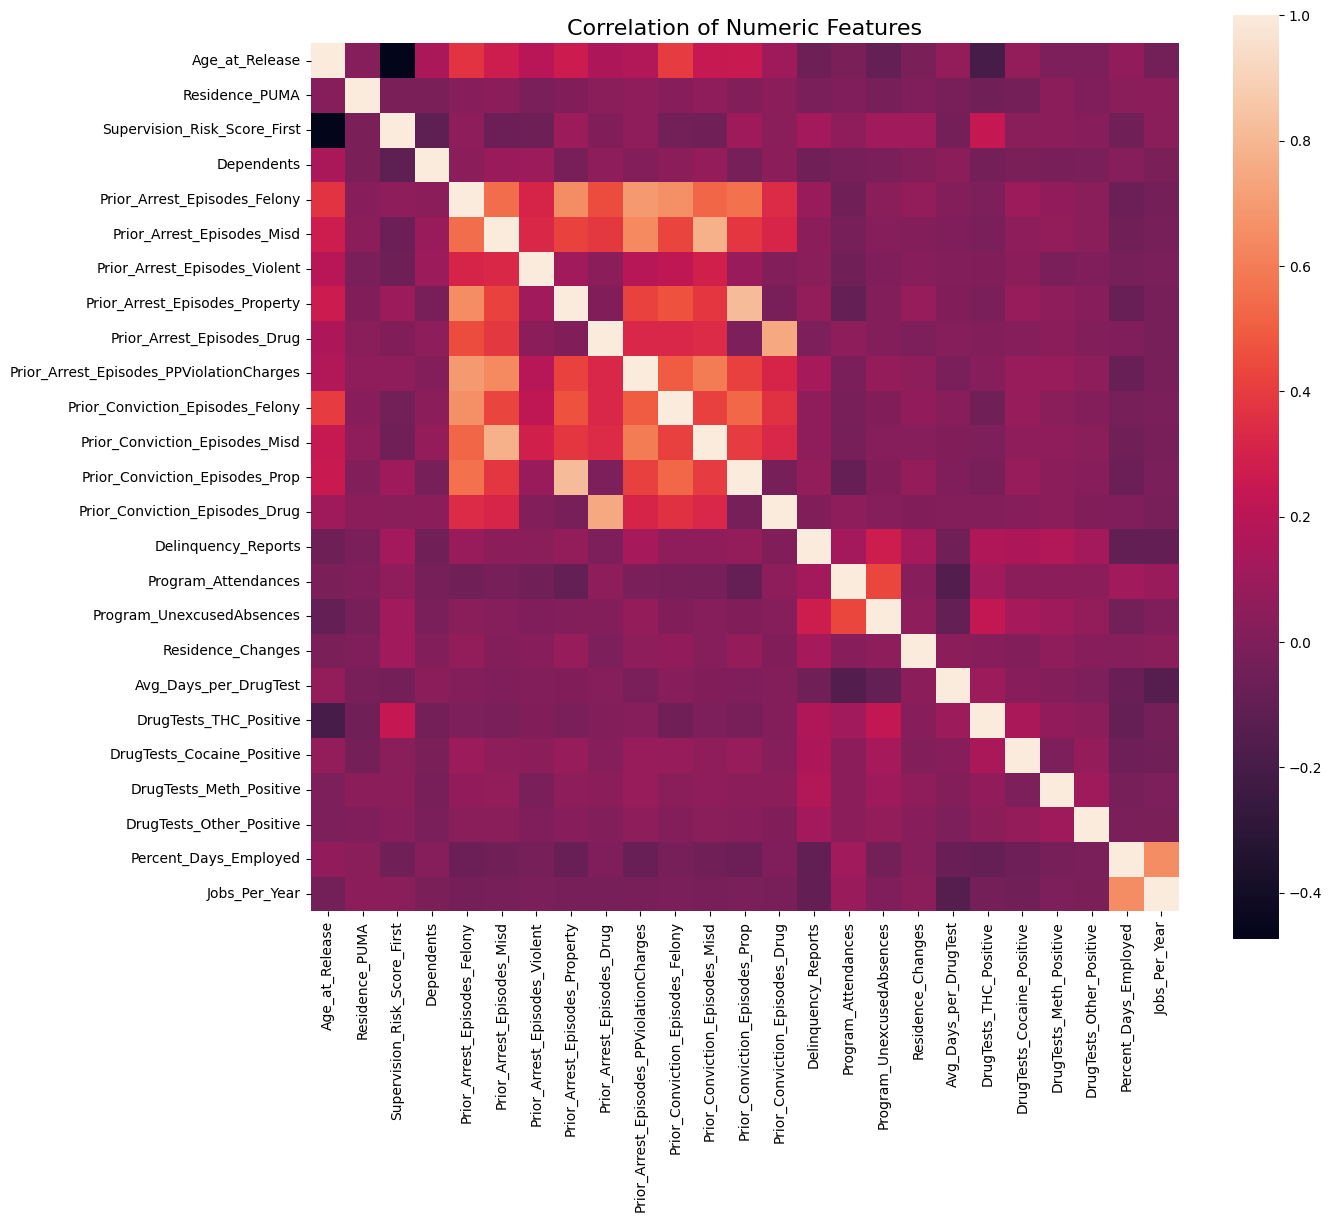

In [167]:
correlation = numeric_features.corr()
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features',y=1,size=16)
sns.heatmap(correlation,square = True)

In [168]:
pip install dython

In [169]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(NIJ)
categorical_features

['Gender',
 'Race',
 'Supervision_Level_First',
 'Education_Level',
 'Prison_Offense',
 'Prison_Years']

In [170]:
from dython.nominal import associations

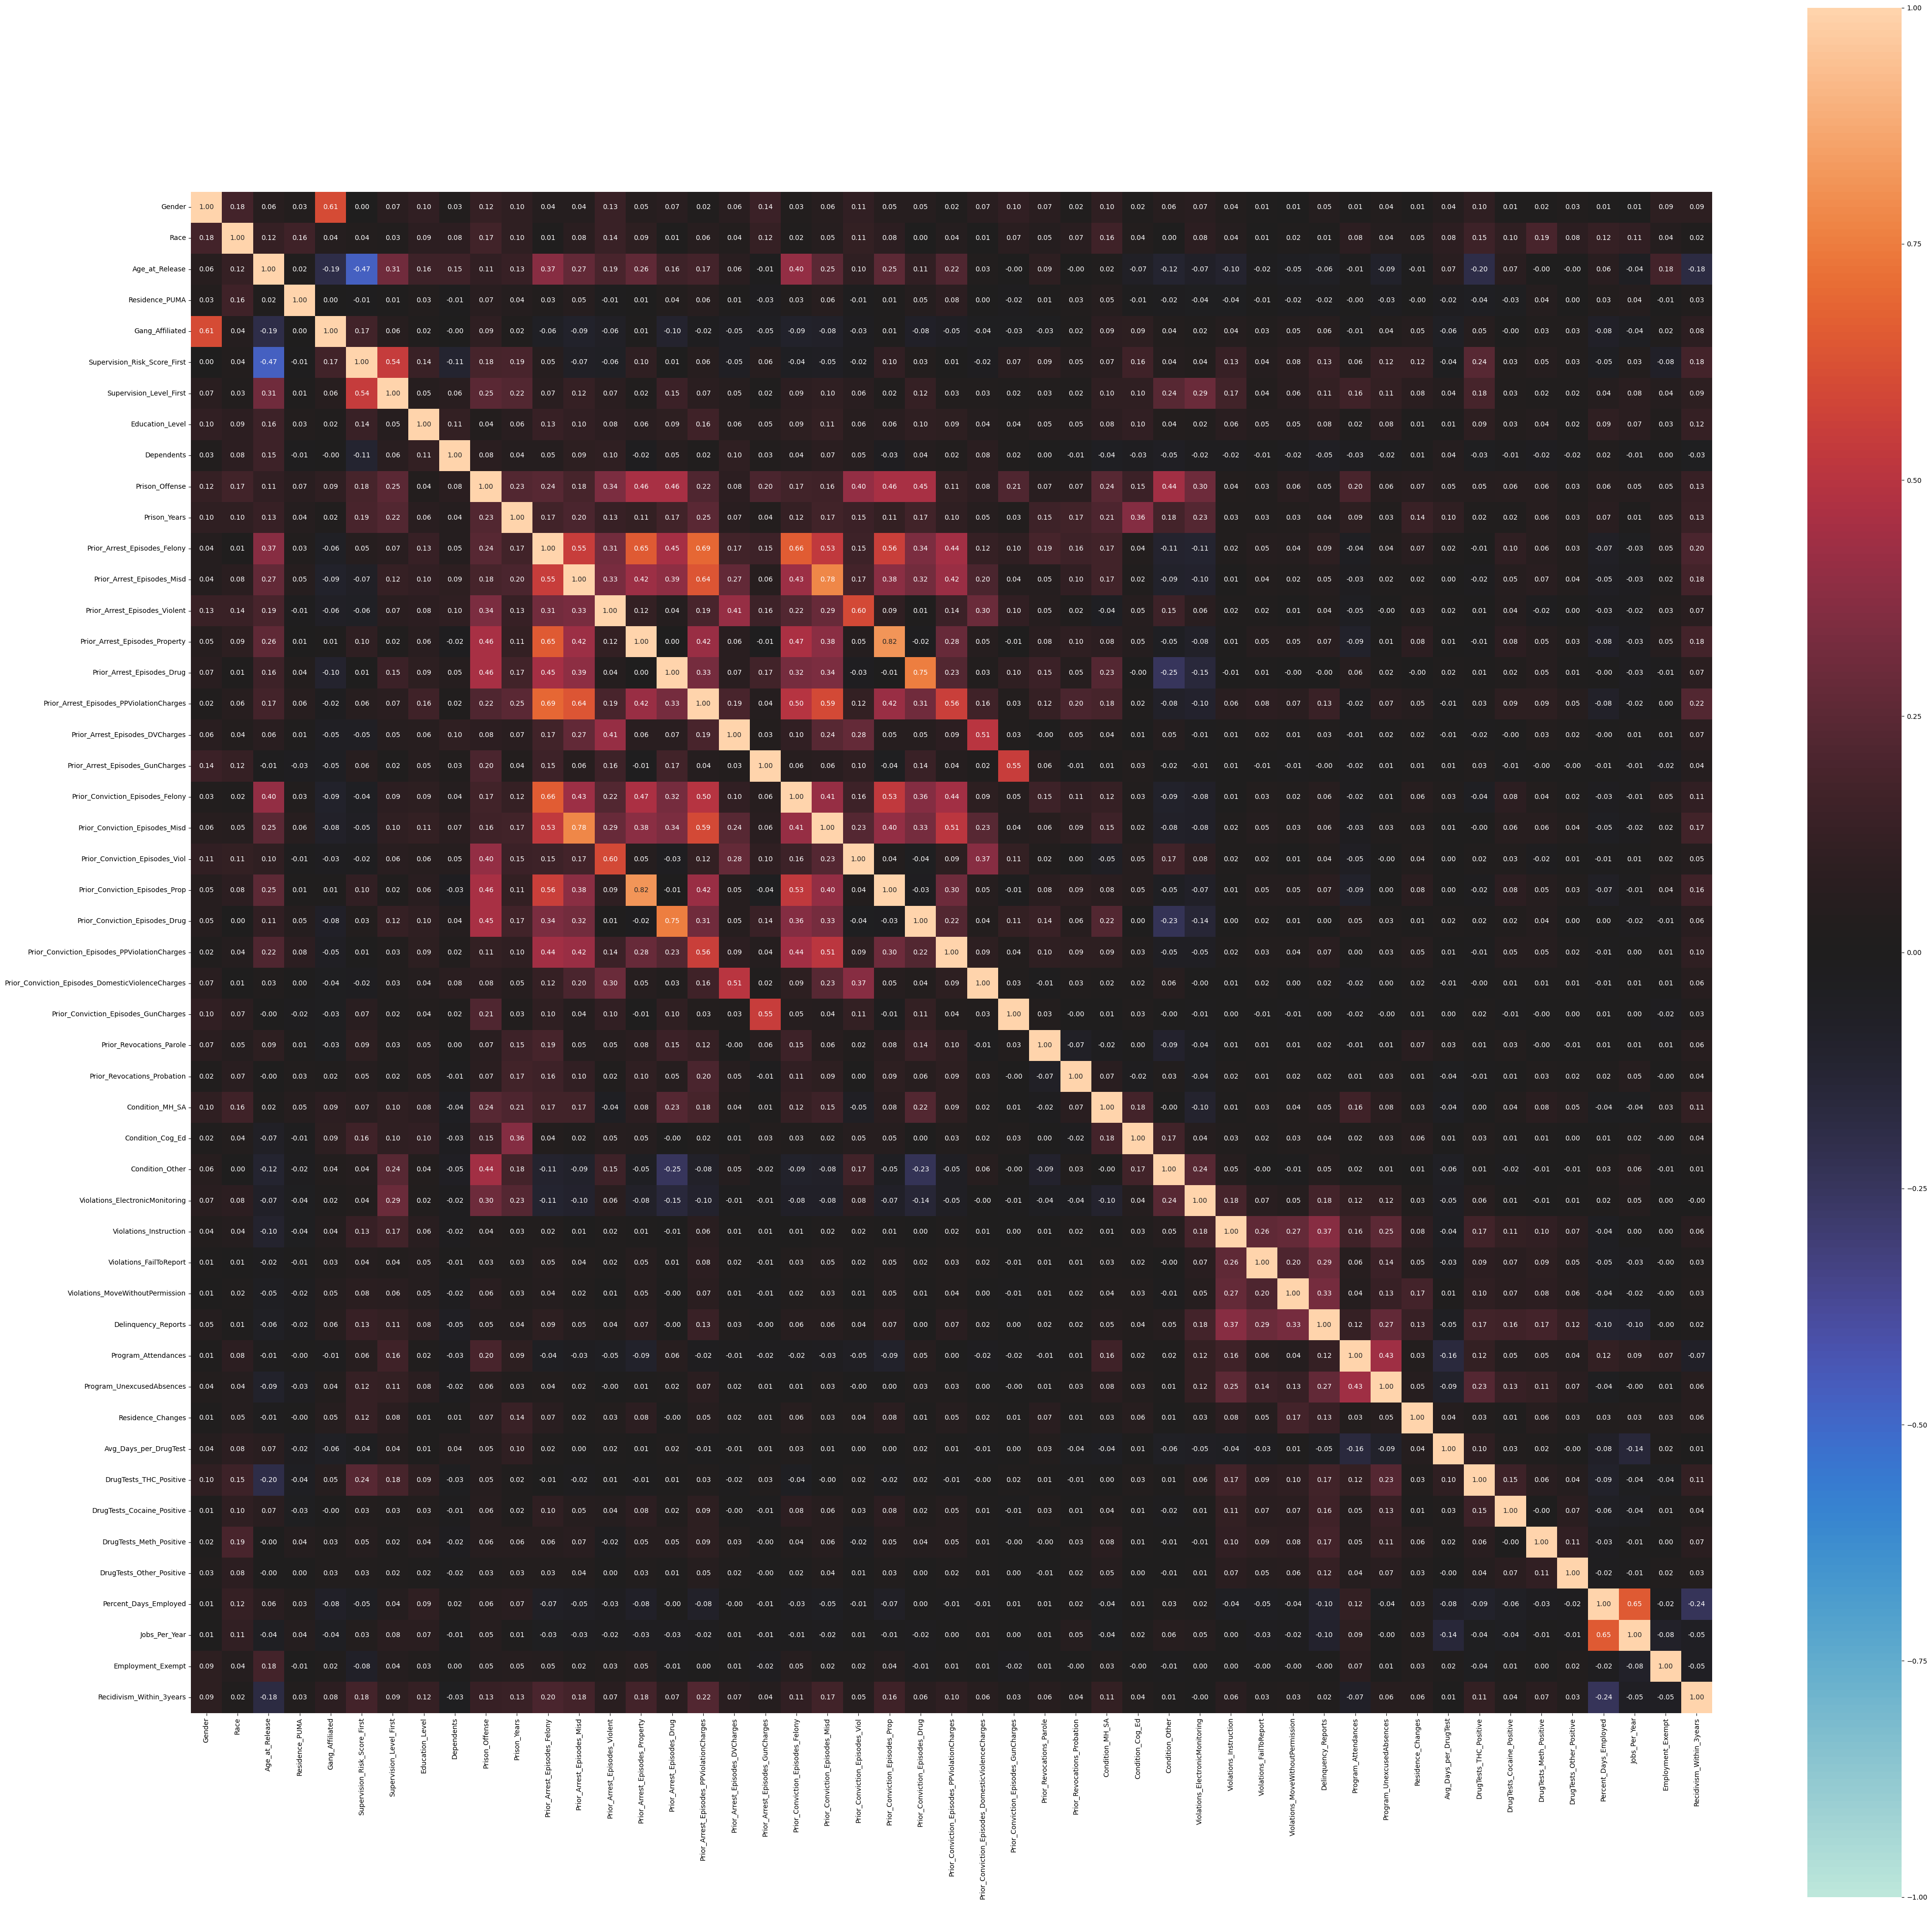

In [171]:
complete_correlation=associations(NIJ, figsize=(50,50))

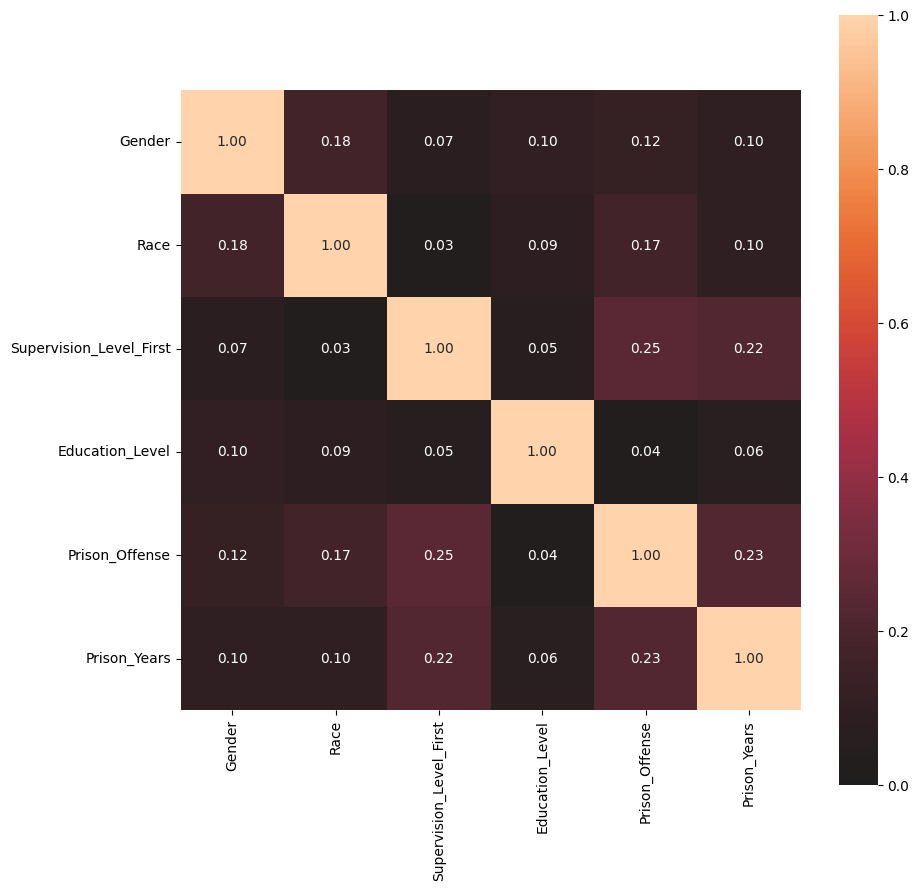

In [172]:
selected_column= NIJ[categorical_features]
categorical_df = selected_column.copy()

categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(10,10))

Zoomed heatmap

Create a new dataframe for key features with that feature one hot encoded test correlations with that feture.

In [173]:
one_hot = pd.get_dummies(NIJ.Gender)
Gender = pd.concat([NIJ, one_hot], axis=1)
Gender.drop(columns=['Gender'], inplace=True)

one_hot = pd.get_dummies(NIJ.Race)
Race = pd.concat([NIJ, one_hot], axis=1)
Race.drop(columns=['Race'], inplace=True)

one_hot = pd.get_dummies(NIJ.Supervision_Level_First)
Supervision_Level_First = pd.concat([NIJ, one_hot], axis=1)
Supervision_Level_First.drop(columns=['Supervision_Level_First'], inplace=True)

one_hot = pd.get_dummies(NIJ.Education_Level)
Education_Level = pd.concat([NIJ, one_hot], axis=1)
Education_Level.drop(columns=['Education_Level'], inplace=True)

one_hot = pd.get_dummies(NIJ.Prison_Offense)
Prison_Offense = pd.concat([NIJ, one_hot], axis=1)
Prison_Offense.drop(columns=['Prison_Offense'], inplace=True)

one_hot = pd.get_dummies(NIJ.Prison_Years)
Prison_Years = pd.concat([NIJ, one_hot], axis=1)
Prison_Years.drop(columns=['Prison_Years'], inplace=True)


In [174]:
one_hot = pd.get_dummies(NIJ.Gender)
NIJ = pd.concat([NIJ, one_hot], axis=1)

one_hot = pd.get_dummies(NIJ.Race)
NIJ = pd.concat([NIJ, one_hot], axis=1)

one_hot = pd.get_dummies(NIJ.Age_at_Release)
NIJ = pd.concat([NIJ, one_hot], axis=1)

one_hot = pd.get_dummies(NIJ.Supervision_Level_First)
NIJ = pd.concat([NIJ, one_hot], axis=1)

one_hot = pd.get_dummies(NIJ.Education_Level)
NIJ = pd.concat([NIJ, one_hot], axis=1)

one_hot = pd.get_dummies(NIJ.Prison_Offense)
NIJ = pd.concat([NIJ, one_hot], axis=1)

one_hot = pd.get_dummies(NIJ.Prison_Years)
NIJ = pd.concat([NIJ, one_hot], axis=1)
NIJ.drop(columns=['Gender', 'Race', 'Age_at_Release', 'Supervision_Level_First', 'Education_Level', 'Prison_Offense', 'Prison_Years'], inplace=True)


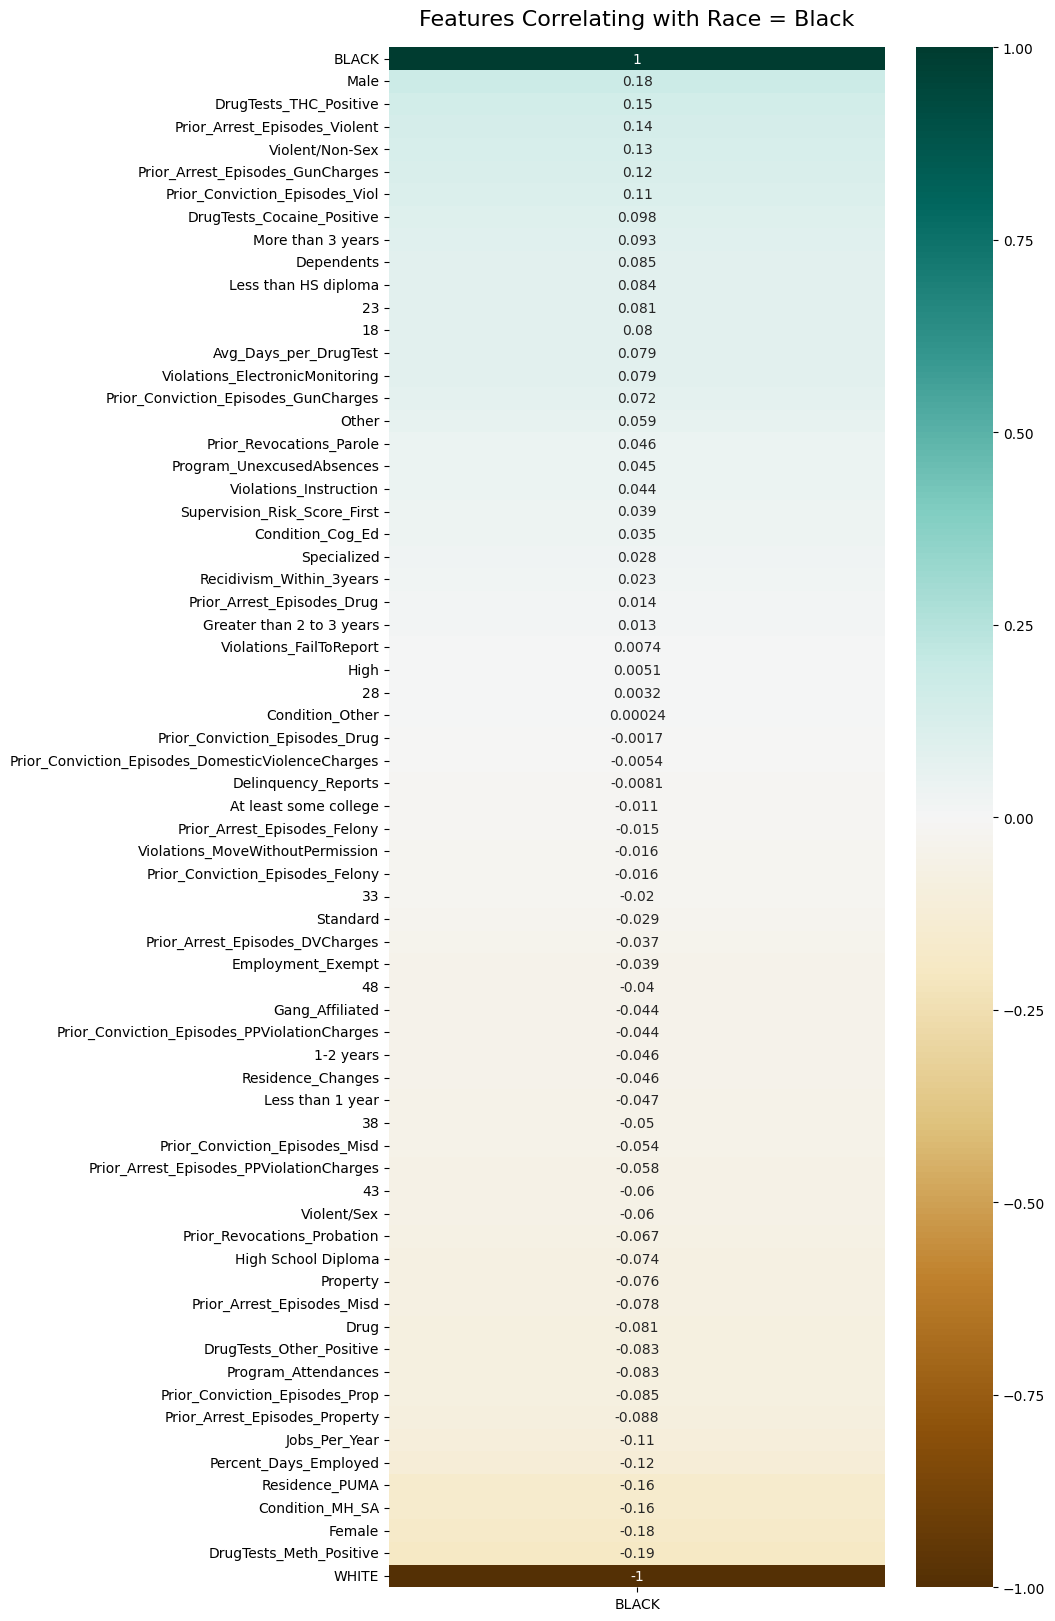

In [175]:
plt.figure(figsize=(8, 20))
heatmap = sns.heatmap(NIJ.corr(method ='pearson')[['BLACK']].sort_values(by='BLACK', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Race = Black', fontdict={'fontsize':16}, pad=16);

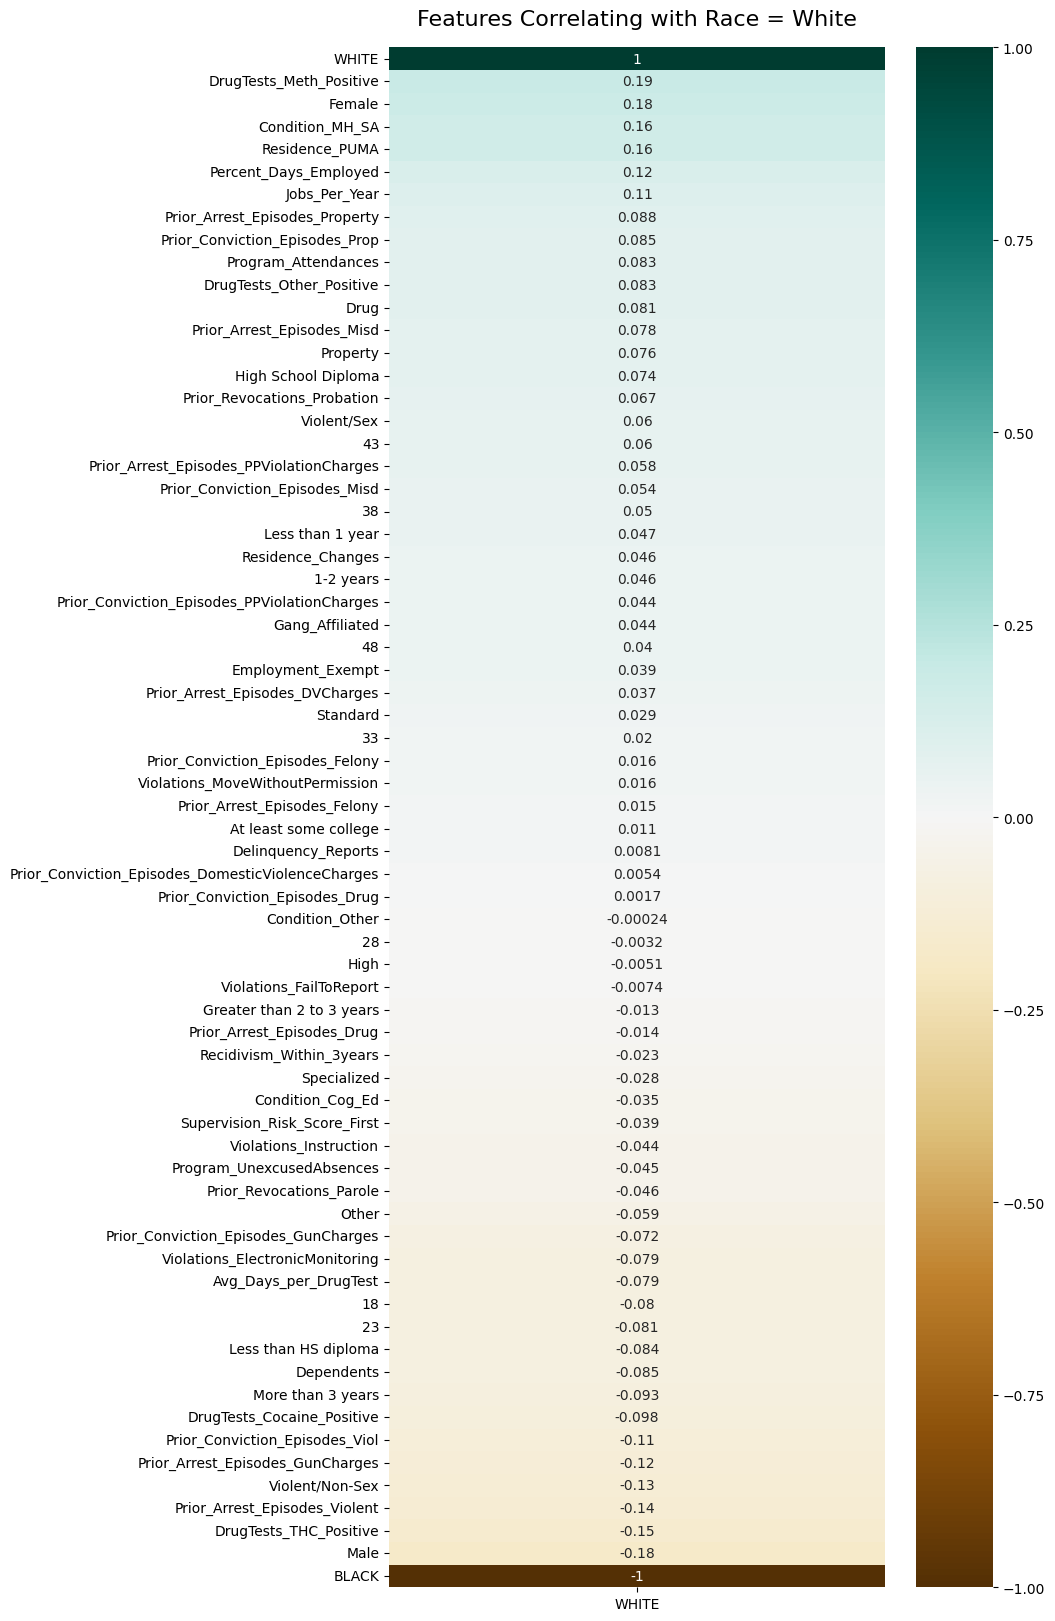

In [176]:
plt.figure(figsize=(8, 20))
heatmap = sns.heatmap(NIJ.corr(method ='pearson')[['WHITE']].sort_values(by='WHITE', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Race = White', fontdict={'fontsize':16}, pad=16);

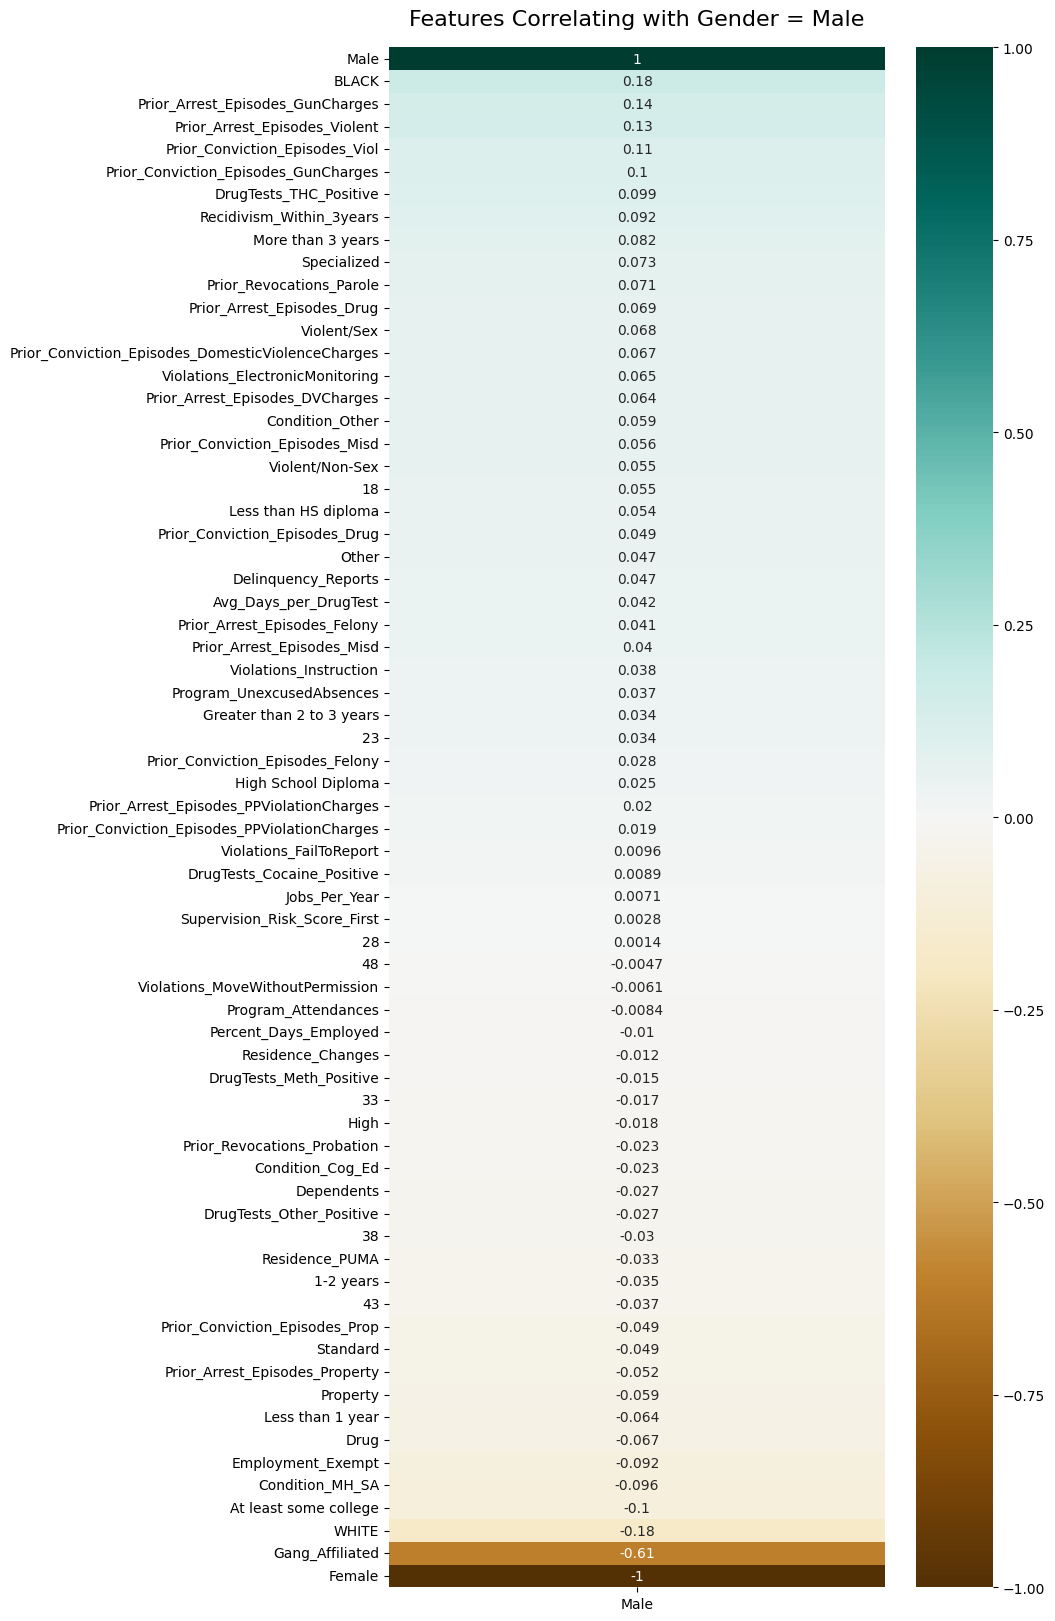

In [177]:
plt.figure(figsize=(8, 20))
heatmap = sns.heatmap(NIJ.corr(method ='pearson')[['Male']].sort_values(by='Male', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Gender = Male', fontdict={'fontsize':16}, pad=16);

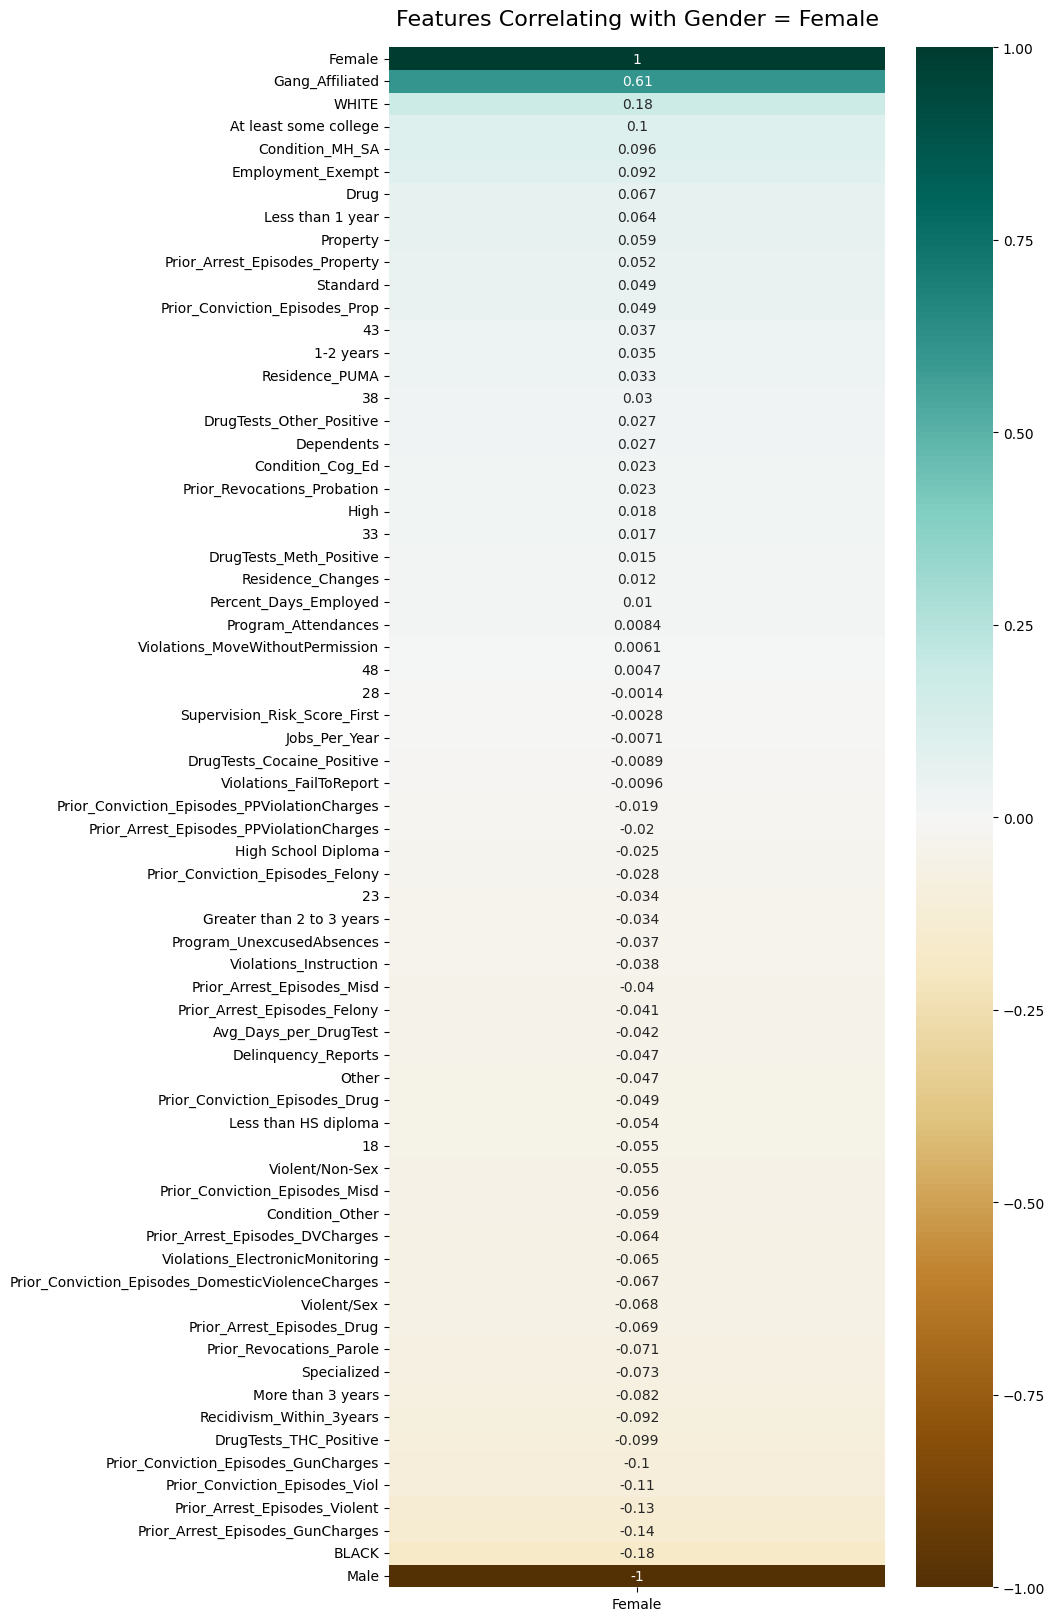

In [178]:
plt.figure(figsize=(8, 20))
heatmap = sns.heatmap(NIJ.corr(method ='pearson')[['Female']].sort_values(by='Female', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Gender = Female', fontdict={'fontsize':16}, pad=16);

Check again with dataset with only male offenders and female offenders

In [179]:
correlation = NIJ.corr(method ='pearson')

k= 10
cols = correlation.nlargest(k,'M')['M'].index
print(cols)
cm = np.corrcoef(NIJ[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

KeyError: 'M'